In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('/content/test_scores.csv')

In [4]:
print(data)

     school school_setting school_type classroom teaching_method  n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard       20.0   
1     ANKYI          Urban  Non-public       6OL        Standard       20.0   
2     ANKYI          Urban  Non-public       6OL        Standard       20.0   
3     ANKYI          Urban  Non-public       6OL        Standard       20.0   
4     ANKYI          Urban  Non-public       6OL        Standard       20.0   
...     ...            ...         ...       ...             ...        ...   
2128  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2129  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2130  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2131  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2132  ZOWMK          Urban      Public       ZBH        Standard       30.0   

     student_id  gender                            

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [6]:

# Supongamos que 'data' es tu DataFrame
columna_categorica = 'student_id'




# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   gender           2133 non-null   object 
 7   lunch            2133 non-null   object 
 8   pretest          2133 non-null   float64
 9   posttest         2133 non-null   float64
dtypes: float64(3), object(7)
memory usage: 166.8+ KB


In [8]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [9]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [10]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [11]:
#resultado
print(data)

      school  school_setting  school_type  classroom  teaching_method  \
0          0               2            0         22                1   
1          0               2            0         22                1   
2          0               2            0         22                1   
3          0               2            0         22                1   
4          0               2            0         22                1   
...      ...             ...          ...        ...              ...   
2128      22               2            1         94                1   
2129      22               2            1         94                1   
2130      22               2            1         94                1   
2131      22               2            1         94                1   
2132      22               2            1         94                1   

      n_student  gender  lunch  pretest  posttest  
0          20.0       0      0     62.0      72.0  
1          20.0    

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   int64  
 1   school_setting   2133 non-null   int64  
 2   school_type      2133 non-null   int64  
 3   classroom        2133 non-null   int64  
 4   teaching_method  2133 non-null   int64  
 5   n_student        2133 non-null   float64
 6   gender           2133 non-null   int64  
 7   lunch            2133 non-null   int64  
 8   pretest          2133 non-null   float64
 9   posttest         2133 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 166.8 KB


In [13]:
# Lectura de Datos
X = data.iloc[:, :9]
y = data.iloc[:, 9]
m = y.size

In [14]:
print(X)
print('*'*25)
print(y)

      school  school_setting  school_type  classroom  teaching_method  \
0          0               2            0         22                1   
1          0               2            0         22                1   
2          0               2            0         22                1   
3          0               2            0         22                1   
4          0               2            0         22                1   
...      ...             ...          ...        ...              ...   
2128      22               2            1         94                1   
2129      22               2            1         94                1   
2130      22               2            1         94                1   
2131      22               2            1         94                1   
2132      22               2            1         94                1   

      n_student  gender  lunch  pretest  
0          20.0       0      0     62.0  
1          20.0       0      0     66.0

In [15]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [16]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      school  school_setting  school_type  classroom  teaching_method  \
0          0               2            0         22                1   
1          0               2            0         22                1   
2          0               2            0         22                1   
3          0               2            0         22                1   
4          0               2            0         22                1   
...      ...             ...          ...        ...              ...   
2128      22               2            1         94                1   
2129      22               2            1         94                1   
2130      22               2            1         94                1   
2131      22               2            1         94                1   
2132      22               2            1         94                1   

      n_student  gender  lunch  pretest  
0          20.0       0      0     62.0  
1          20.0       0      0     66.0

In [17]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [18]:
print(X)

[[ 1.         -1.729034    1.02647958 ... -1.00989423 -0.86922699
   0.51947714]
 [ 1.         -1.729034    1.02647958 ... -1.00989423 -0.86922699
   0.8144641 ]
 [ 1.         -1.729034    1.02647958 ...  0.9902027  -0.86922699
   0.66697062]
 ...
 [ 1.          1.64772018  1.02647958 ... -1.00989423  1.15044748
  -0.73421741]
 [ 1.          1.64772018  1.02647958 ...  0.9902027   1.15044748
  -0.66047067]
 [ 1.          1.64772018  1.02647958 ...  0.9902027   1.15044748
  -1.02920437]]


In [19]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [20]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 6.71017985e+01 -1.66037245e-01 -4.44231638e-03  1.94877420e-02
  4.44360682e-02 -2.91055856e+00 -3.45970476e-01 -5.62745606e-02
 -4.94410113e-01  1.24304509e+01]
El valor predecido es (usando el descenso por el gradiente): 75.5397


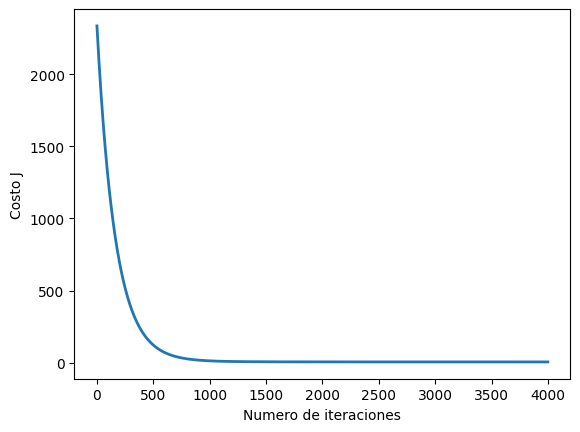

In [22]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#  Estimar el puntaje de postes para un un estudiante
X_array = [1, 3, 1, 1, 100, 1, 48, 0, 1, 69]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))